In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("Training.csv")
df_valid = pd.read_csv("Testing.csv")

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
df.shape

(4920, 133)

In [5]:
df_valid.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [6]:
df_valid.shape

(42, 133)

In [7]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [8]:
disease_counts = df["prognosis"].value_counts() 
disease_counts

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

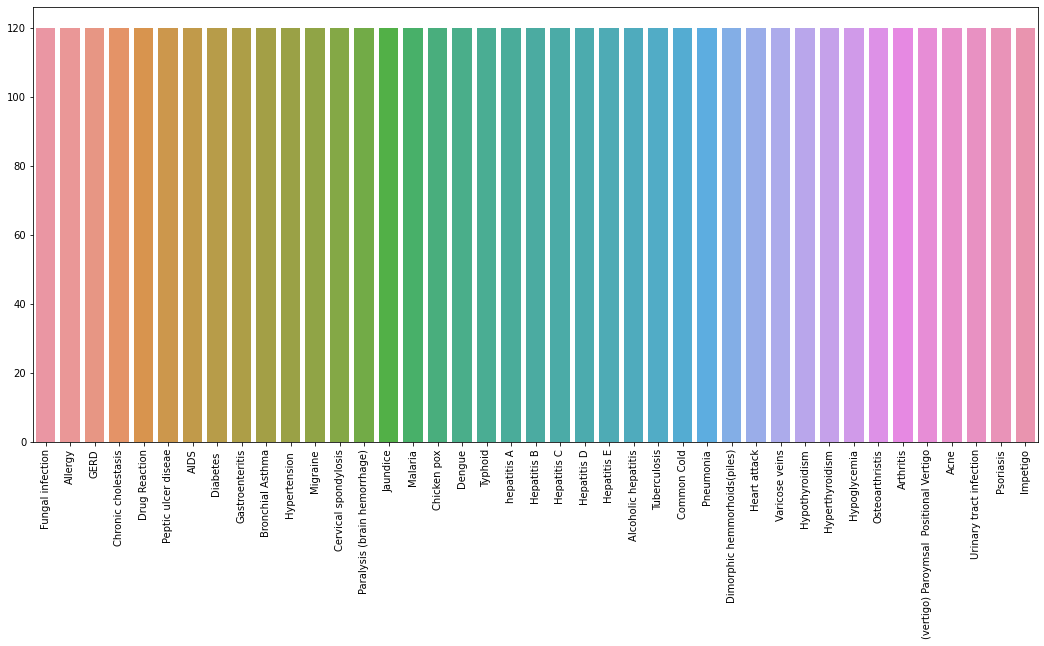

In [9]:
plt.figure(figsize = (18,8))
sns.barplot(x = df["prognosis"].unique(), y = disease_counts.values, data = df)
plt.xticks(rotation=90)
#plt.savefig('count')
plt.show()

In [10]:
disease_counts_valid = df_valid["prognosis"].value_counts() 
disease_counts_valid

Fungal infection                           2
Hepatitis C                                1
Hepatitis E                                1
Alcoholic hepatitis                        1
Tuberculosis                               1
Common Cold                                1
Pneumonia                                  1
Dimorphic hemmorhoids(piles)               1
Heart attack                               1
Varicose veins                             1
Hypothyroidism                             1
Hyperthyroidism                            1
Hypoglycemia                               1
Osteoarthristis                            1
Arthritis                                  1
(vertigo) Paroymsal  Positional Vertigo    1
Acne                                       1
Urinary tract infection                    1
Psoriasis                                  1
Hepatitis D                                1
Hepatitis B                                1
Allergy                                    1
hepatitis 

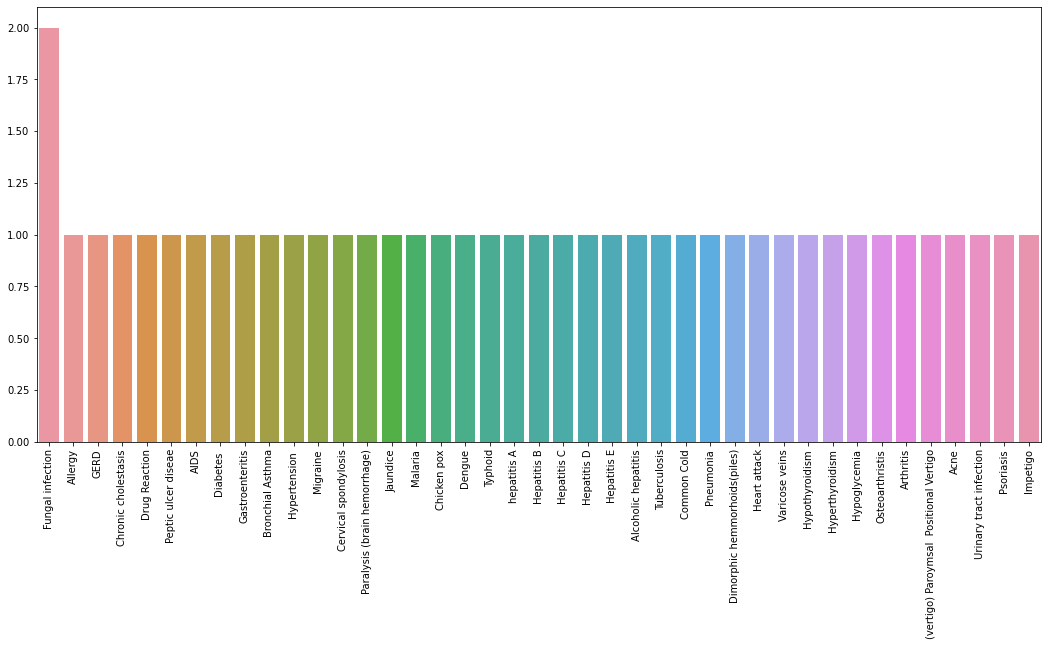

In [11]:
plt.figure(figsize = (18,8))
sns.barplot(x = df_valid["prognosis"].unique(), y = disease_counts_valid.values, data = df)
plt.xticks(rotation=90)
#plt.savefig('count')
plt.show()

In [12]:
target_df = pd.DataFrame(df['prognosis'], columns=['prognosis'])
labelencoder = LabelEncoder()
target_df['Prognosis_Cat'] = labelencoder.fit_transform(target_df['prognosis'])
target_df

,prognosis,Prognosis_Cat
0,Fungal infection,15
1,Fungal infection,15
2,Fungal infection,15
3,Fungal infection,15
4,Fungal infection,15
...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0
4916,Acne,2
4917,Urinary tract infection,38
4918,Psoriasis,35


In [13]:
target_valid = pd.DataFrame(df_valid['prognosis'], columns=['prognosis'])
target_valid['Prognosis_Cat'] = labelencoder.fit_transform(target_valid['prognosis'])
target_valid

,prognosis,Prognosis_Cat
0,Fungal infection,15
1,Allergy,4
2,GERD,16
3,Chronic cholestasis,9
4,Drug Reaction,14
5,Peptic ulcer diseae,33
6,AIDS,1
7,Diabetes,12
8,Gastroenteritis,17
9,Bronchial Asthma,6


In [14]:
X = df.drop('prognosis',axis=1)
X_valid = df_valid.drop('prognosis',axis=1)
y = target_df['Prognosis_Cat']
y_valid = target_valid['Prognosis_Cat']

In [15]:
print(X.shape)
print(y.shape)
print(X_valid.shape)
print(y_valid.shape)

(4920, 132)
(4920,)
(42, 132)
(42,)


In [16]:
X = X.drop('fluid_overload', axis=1)
X.rename(columns = {'fluid_overload.1':'fluid_overload'}, inplace = True)
X_valid = X_valid.drop('fluid_overload', axis=1)
X_valid.rename(columns = {'fluid_overload.1':'fluid_overload'}, inplace = True)
print(X.shape)
print(X_valid.shape)

(4920, 131)
(42, 131)


<AxesSubplot:>

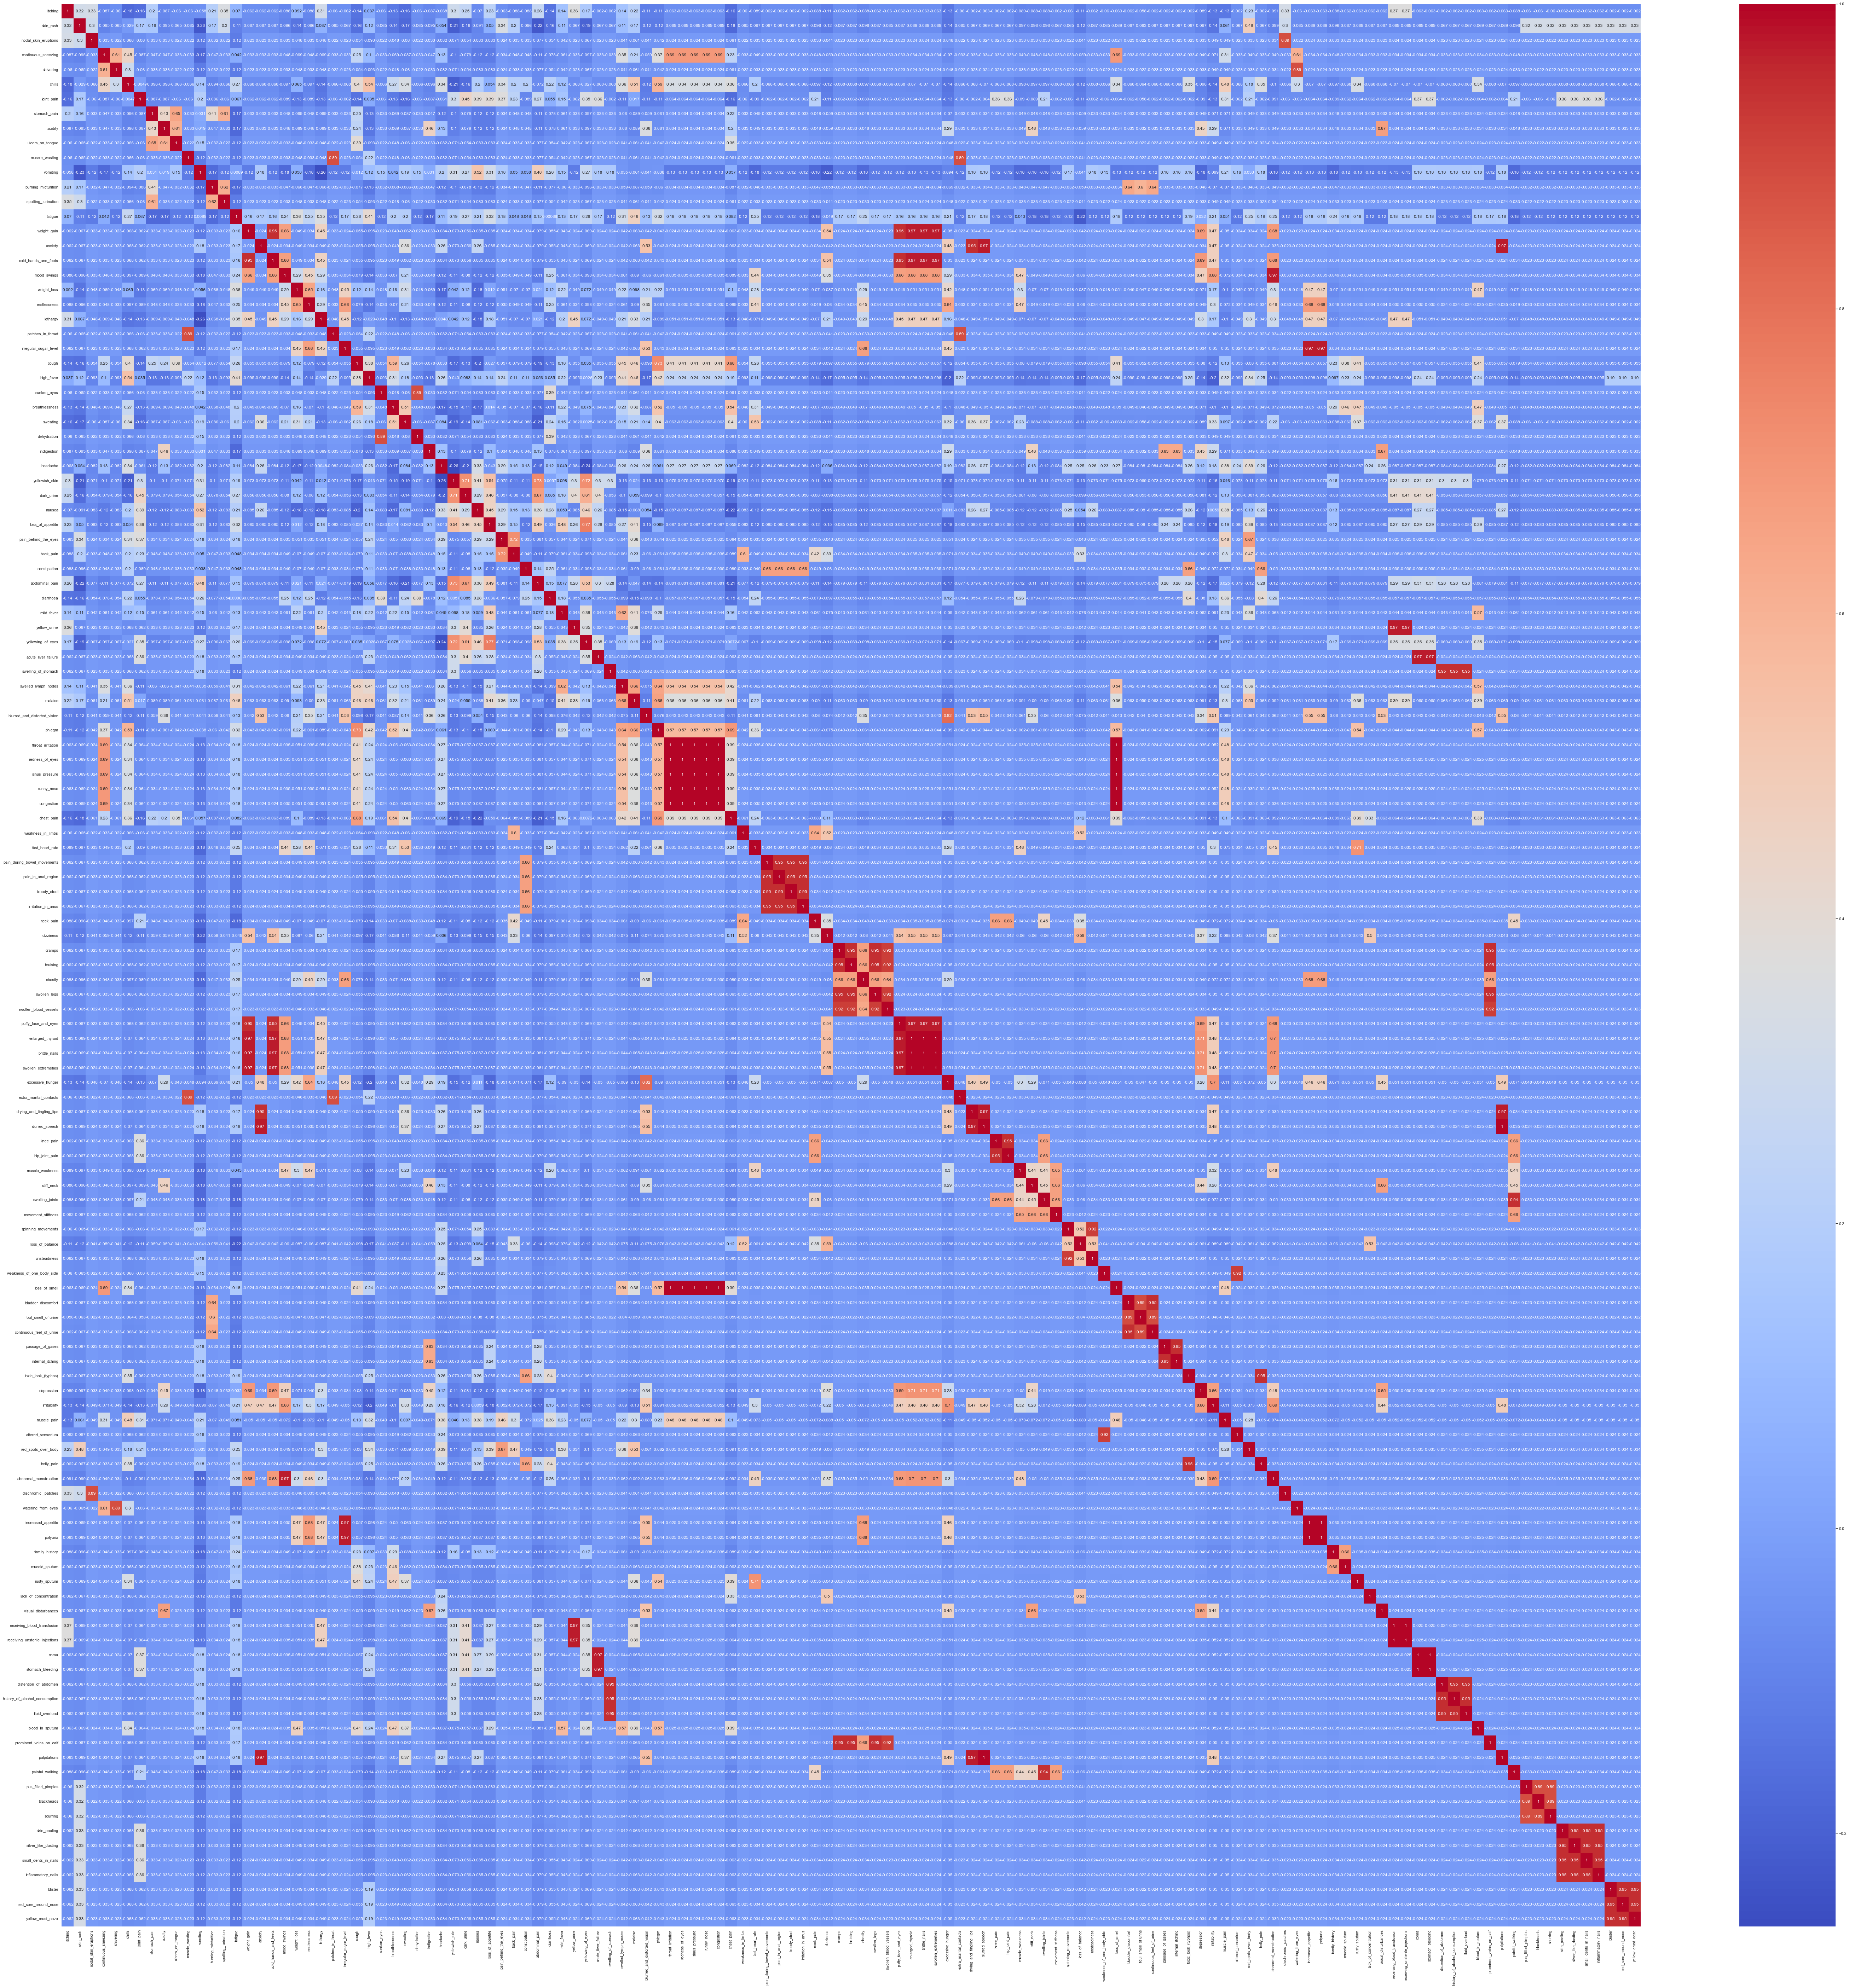

In [17]:
sns.set(rc = {'figure.figsize':(100,100)})
sns.heatmap(X.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
#plt.savefig('Corr')

In [18]:
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(to_drop)

['cold_hands_and_feets', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'drying_and_tingling_lips', 'slurred_speech', 'hip_joint_pain', 'unsteadiness', 'loss_of_smell', 'continuous_feel_of_urine', 'internal_itching', 'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'red_sore_around_nose', 'yellow_crust_ooze']


C:\Users\Amith\AppData\Local\Temp\ipykernel_15084\57579272.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [19]:
for feat in to_drop:
    X = X.drop(feat, axis=1)
    X_valid = X_valid.drop(feat,axis=1)

In [20]:
print(X.shape)
print(X_valid.shape)

(4920, 89)
(42, 89)


In [21]:
components = None
pca = PCA(n_components = components)
pca.fit(X)

PCA()

In [22]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)

Cumulative Variances (Percentage):
[ 14.34598656  26.1931164   33.57002589  40.56276466  46.60297201
  50.57177234  54.18813287  57.65808696  60.57828848  63.37931108
  65.82864205  68.19476534  70.37992724  72.42042421  74.28466706
  76.03239704  77.61138944  79.11943756  80.59005974  82.00343206
  83.32294464  84.57019186  85.69515945  86.78175668  87.79967436
  88.78456765  89.70248395  90.56178662  91.37086479  92.15702238
  92.90206269  93.59954223  94.28761201  94.90659559  95.43541707
  95.89413592  96.33342787  96.72677676  97.11724211  97.30138439
  97.47005328  97.60607086  97.73084319  97.84701873  97.95391399
  98.05826485  98.15953678  98.25277205  98.33926506  98.41774528
  98.49262233  98.56163079  98.62840258  98.69128601  98.75347961
  98.81145925  98.86773255  98.92262871  98.97274735  99.02152351
  99.06833771  99.11373774  99.15867719  99.20361664  99.24855609
  99.29349553  99.33843498  99.38337443  99.42831388  99.47226509
  99.5153875   99.55629122  99.59615774  

Text(0, 0.5, 'Explained variance (%)')

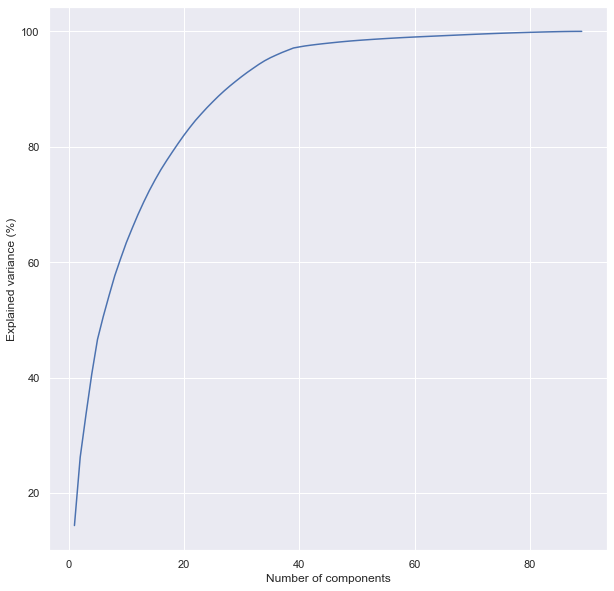

In [23]:
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.figure(figsize=(10,10))
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [24]:
comp = [0.85,0.90,0.95,0.99]

Cumulative Variances (Percentage):
[14.34598656 26.1931164  33.57002589 40.56276466 46.60297201 50.57177234
 54.18813287 57.65808696 60.57828848 63.37931108 65.82864205 68.19476534
 70.37992724 72.42042421 74.28466706 76.03239704 77.61138944 79.11943756
 80.59005974 82.00343206 83.32294464 84.57019186 85.69515945]
Number of components: 23 for 85 % variance


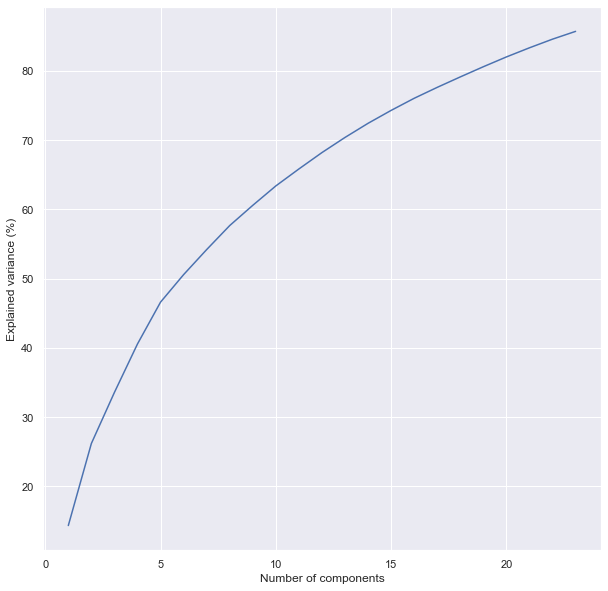

Cumulative Variances (Percentage):
[14.34598656 26.1931164  33.57002589 40.56276466 46.60297201 50.57177234
 54.18813287 57.65808696 60.57828848 63.37931108 65.82864205 68.19476534
 70.37992724 72.42042421 74.28466706 76.03239704 77.61138944 79.11943756
 80.59005974 82.00343206 83.32294464 84.57019186 85.69515945 86.78175668
 87.79967436 88.78456765 89.70248395 90.56178662]
Number of components: 28 for 90 % variance


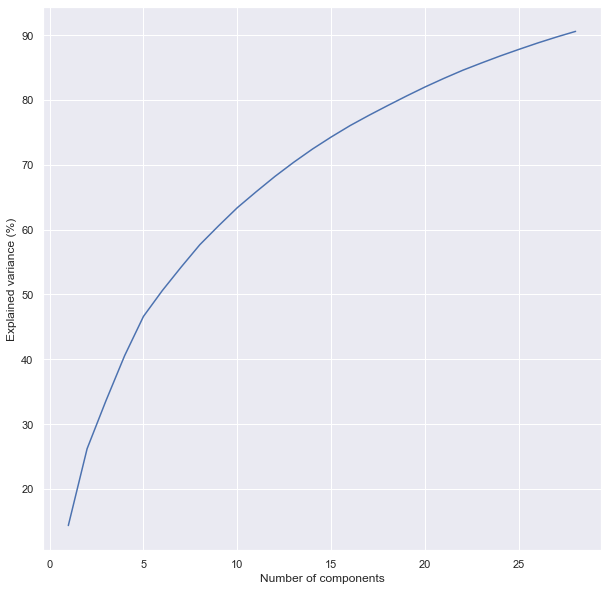

Cumulative Variances (Percentage):
[14.34598656 26.1931164  33.57002589 40.56276466 46.60297201 50.57177234
 54.18813287 57.65808696 60.57828848 63.37931108 65.82864205 68.19476534
 70.37992724 72.42042421 74.28466706 76.03239704 77.61138944 79.11943756
 80.59005974 82.00343206 83.32294464 84.57019186 85.69515945 86.78175668
 87.79967436 88.78456765 89.70248395 90.56178662 91.37086479 92.15702238
 92.90206269 93.59954223 94.28761201 94.90659559 95.43541707]
Number of components: 35 for 95 % variance


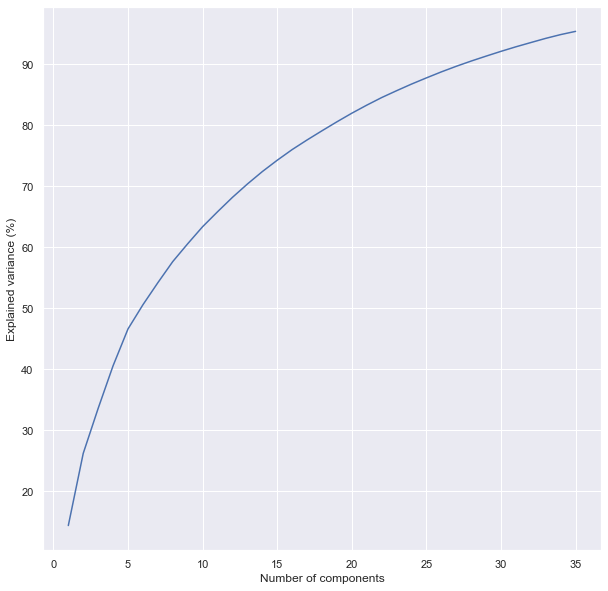

Cumulative Variances (Percentage):
[14.34598656 26.1931164  33.57002589 40.56276466 46.60297201 50.57177234
 54.18813287 57.65808696 60.57828848 63.37931108 65.82864205 68.19476534
 70.37992724 72.42042421 74.28466706 76.03239704 77.61138944 79.11943756
 80.59005974 82.00343206 83.32294464 84.57019186 85.69515945 86.78175668
 87.79967436 88.78456765 89.70248395 90.56178662 91.37086479 92.15702238
 92.90206269 93.59954223 94.28761201 94.90659559 95.43541707 95.89413592
 96.33342787 96.72677676 97.11724211 97.30138439 97.47005328 97.60607086
 97.73084319 97.84701873 97.95391399 98.05826485 98.15953678 98.25277205
 98.33926506 98.41774528 98.49262233 98.56163079 98.62840258 98.69128601
 98.75347961 98.81145925 98.86773255 98.92262871 98.97274735 99.02152351]
Number of components: 60 for 99 % variance


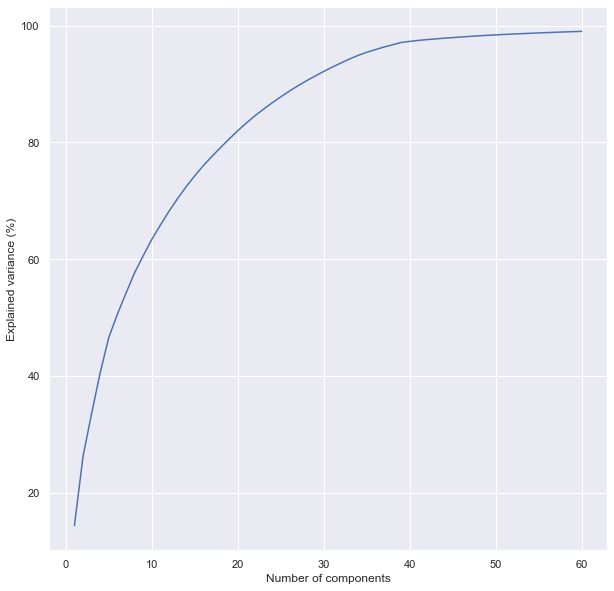

In [25]:
for i in comp:
    var_per = int(i*100)
    pca = PCA(n_components = i)
    pca.fit(X)
    print("Cumulative Variances (Percentage):")
    print(np.cumsum(pca.explained_variance_ratio_ * 100))
    components = len(pca.explained_variance_ratio_)
    print(f'Number of components: {components}', f'for {var_per}', '% variance')
    plt.figure(figsize=(10,10))
    plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
    plt.xlabel("Number of components")
    plt.ylabel("Explained variance (%)")
    #plt.savefig(str(var_per))
    plt.show()

In [26]:
pca = PCA(n_components = 0.85)
pca.fit(X)

PCA(n_components=0.85)

In [68]:
pca_components = abs(pca.components_)
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    temp = np.argpartition(-(pca_components[row]), 4)
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['nausea', 'vomiting', 'yellow_urine', 'constipation']
Component 1: ['cough', 'chills', 'swelling_of_stomach', 'irregular_sugar_level']
Component 2: ['indigestion', 'vomiting', 'dark_urine', 'fatigue']
Component 3: ['fast_heart_rate', 'swollen_extremeties', 'fatigue', 'swelled_lymph_nodes']
Component 4: ['skin_rash', 'indigestion', 'phlegm', 'vomiting']
Component 5: ['cough', 'abdominal_pain', 'indigestion', 'phlegm']
Component 6: ['itching', 'vomiting', 'joint_pain', 'congestion']
Component 7: ['joint_pain', 'skin_rash', 'breathlessness', 'constipation']
Component 8: ['congestion', 'bruising', 'irritation_in_anus', 'acidity']
Component 9: ['abdominal_pain', 'excessive_hunger', 'fatigue', 'chills']
Component 10: ['weakness_in_limbs', 'swollen_extremeties', 'patches_in_throat', 'mood_swings']
Component 11: ['cough', 'dark_urine', 'vomiting', 'joint_pain']
Component 12: ['joint_pain', 'stomach_pain', 'nausea', 'diarrhoea']
Comp

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [29]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_valid_pca = pca.transform(X_valid)
print(X_train_pca.shape)
print(X_test_pca.shape)
print(X_valid_pca.shape)

(2952, 23)
(1968, 23)
(42, 23)


In [30]:
param_rfc = {
    "n_estimators" : [5, 10, 15],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'max_features' : ['sqrt', 'log2']
}

In [31]:
rfc = RandomForestClassifier()
gs_rfc = GridSearchCV(estimator = rfc, param_grid = param_rfc, cv=3, n_jobs = -1, verbose=1)
gs_rfc.fit(X_train_pca, y_train)

Fitting 3 folds for each of 6912 candidates, totalling 20736 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [5, 10, 15]},
             verbose=1)

In [32]:
gs_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 15}

In [33]:
rfc = RandomForestClassifier(criterion= 'entropy',
 max_depth= 6,
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split = 2 ,
 n_estimators = 15)

In [34]:
rfc.fit(X_train_pca, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       n_estimators=15)

In [35]:
rfc.score(X_test_pca, y_test)

1.0

In [36]:
rfc.score(X_valid_pca, y_valid)

1.0

In [37]:
pred = rfc.predict(X_test_pca)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        51
           4       1.00      1.00      1.00        49
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00        46
          10       1.00      1.00      1.00        50
          11       1.00      1.00      1.00        58
          12       1.00      1.00      1.00        54
          13       1.00      1.00      1.00        52
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        40
          16       1.00      1.00      1.00        56
          17       1.00    

In [38]:
pred = rfc.predict(X_valid_pca)
print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00    

In [39]:
nb = GaussianNB()
params_nb = {'var_smoothing': [1e-3, 1e-4, 1e-5]}
gs_nb = GridSearchCV(estimator=nb, 
                     param_grid=params_nb, 
                     cv=5,
                     n_jobs = -1,
                     verbose=3)
gs_nb.fit(X_train_pca, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0.001, 0.0001, 1e-05]}, verbose=3)

In [40]:
gs_nb.best_params_

{'var_smoothing': 0.001}

In [41]:
nb = GaussianNB(var_smoothing = 0.001)

In [42]:
nb.fit(X_train_pca, y_train)

GaussianNB(var_smoothing=0.001)

In [43]:
nb.score(X_test_pca, y_test)

0.9984756097560976

In [44]:
nb.score(X_valid_pca, y_valid)

1.0

In [45]:
pred_nb = nb.predict(X_test_pca)
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        51
           4       1.00      1.00      1.00        49
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00        46
          10       1.00      1.00      1.00        50
          11       1.00      1.00      1.00        58
          12       1.00      1.00      1.00        54
          13       1.00      1.00      1.00        52
          14       1.00      1.00      1.00        45
          15       1.00      1.00      1.00        40
          16       1.00      1.00      1.00        56
          17       1.00    

In [80]:
pred_nb = nb.predict(X_valid_pca)
print(classification_report(y_valid, pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00    

In [47]:
svm = SVC()

In [56]:
params_svm = { 'C': [0.1, 1, 10, 100], 
              'gamma': [0.01, 0.001, 0.0001],
              'kernel':['rbf','poly','sigmoid','linear'],
              'degree':[2,3,4]}
gs_svm = GridSearchCV(estimator=svm, 
                     param_grid=params_svm, 
                     cv=5,
                     n_jobs = -1,
                     verbose=3)
gs_svm.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=SVC(C=1, degree=2, gamma=0.01, kernel='sigmoid'),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=3)

In [57]:
gs_svm.best_params_

{'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'sigmoid'}

In [58]:
svm = SVC(C= 1, degree = 2, gamma = 0.01, kernel = 'sigmoid')

In [59]:
svm.fit(X_train_pca, y_train)

SVC(C=1, degree=2, gamma=0.01, kernel='sigmoid')

In [60]:
svm.score(X_test_pca, y_test)

0.9507113821138211

In [61]:
svm.score(X_valid_pca, y_valid)

0.9761904761904762

In [62]:
pred_svm = svm.predict(X_test_pca)
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        48
           1       1.00      1.00      1.00        45
           2       1.00      0.78      0.88        51
           3       0.91      1.00      0.95        51
           4       1.00      1.00      1.00        49
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        50
           9       0.96      1.00      0.98        46
          10       1.00      1.00      1.00        50
          11       1.00      1.00      1.00        58
          12       1.00      1.00      1.00        54
          13       1.00      0.88      0.94        52
          14       1.00      0.84      0.92        45
          15       0.85      1.00      0.92        40
          16       1.00      1.00      1.00        56
          17       1.00    

C:\Users\Amith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
pred_svm = svm.predict(X_valid_pca)
print(classification_report(y_valid, pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00    

C:\Users\Amith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
svm.score(X_train_pca,y_train)

0.9535907859078591

In [66]:
rfc.score(X_train_pca,y_train)

1.0

In [67]:
nb.score(X_train_pca,y_train)

0.9989837398373984

In [97]:
import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in rfc.estimators_:
    export_graphviz(tree_in_forest,out_file='tree.dot',
    feature_names=col,
    filled=True,
    rounded=True)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    name = 'tree' + str(i_tree)
    graph.write_png(name+  '.png')
    os.system('dot -Tpng tree.dot -o tree.png')
    i_tree +=1